<a href="https://colab.research.google.com/github/SammyGbabs/Data_Preprocessing/blob/main/ml_pipeline_Samuel_Babalola_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Skin Lesion Classification Model

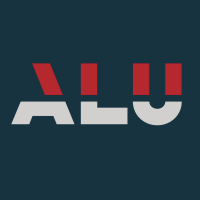


## Student Name: Samuel Babalola

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **1)  Slice 3D Dataset (https://www.nature.com/articles/s41597-024-03743-w)**

   **2) IEEE Xplore (https://ieeexplore.ieee.org/document/10112085)**

   **3) National Institute of Health: PAD UFES-20 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7479321/)**

   **4) GTS: MonkeyPox Skin Lesion Dataset (https://gts.ai/dataset-download/monkeypox-skin-lesion-dataset/)**
   
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

**Yes, Aggregating data from multiple sources is essential for a comprehensive analysis in this project. By combining data from various datasets, a wider range of skin lesion types, imaging perspectives, and disease characteristics can be captured. This diversity in data enhances the model's ability to generalize across different skin conditions and improves classification accuracy. Moreover, using multiple sources can help mitigate biases inherent in any single dataset, contributing to a more robust and reliable model capable of distinguishing between similar conditions.**


In [ ]:
#insert code if necessary
import os
import shutil
from google.colab import drive


#Mount Google Drive
drive.mount('/content/drive')

#Define Google Drive paths
source_dirs = [
    '/content/drive/MyDrive/Dataset_1',
    '/content/drive/MyDrive/Dataset_2',
    '/content/drive/MyDrive/Dataset_3',
]
target_base_dir = '/content/drive/MyDrive/aggregated_images'

# Ensure target directory exists
os.makedirs(target_base_dir, exist_ok=True)

# Loop over each dataset
for i, source_dir in enumerate(source_dirs, start=1):
    # Loop over each image class (assuming class subfolders exist in each dataset)
    for class_name in os.listdir(source_dir):
        class_source_path = os.path.join(source_dir, class_name)
        class_target_path = os.path.join(target_base_dir, class_name)

        # Create class directory in target folder if it doesn't exist
        os.makedirs(class_target_path, exist_ok=True)

        # Move images to the target directory
        for img_file in os.listdir(class_source_path):
            src_file = os.path.join(class_source_path, img_file)
            dest_file = os.path.join(class_target_path, f"{i}_{img_file}")  # Prefix to avoid overwriting
            shutil.copy(src_file, dest_file)

print("Image data aggregation complete.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image data aggregation complete.




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

**CURRENT FORMAT OF THE DATA**

 **The image data is stored in various directory structures across multiple sources, with each dataset having different resolutions, naming conventions, and file formats (e.g., JPEG, PNG). Additionally, each dataset has label information organized in a consistent structure, with four subfolders named after the classes (e.g., monkeypox, measles, etc.). Within each subfolder, the images are named according to their class, followed by a unique number (e.g., monkeypox001.jpg, measles045.png).**

 **PLANNED TRANSFORMATION TO A UNIFIED FORMAT**

To prepare the image data for analysis and modeling, several transformations will be applied to standardize its structure and content across all sources:

**A) Standardize Directory Structure**: All datasets will be consolidated into a single directory structure organized by class. A main folder named `aggregated_images` will contain subfolders for each class label (e.g., `monkeypox`, `measles`). This layout aligns with conventional data organization practices, facilitating easier data loading and processing in machine learning workflows.

**B) Uniform Image Format and Resolution**: Images will be converted to a consistent file format (JPEG) and resized to a standard resolution, such as 224x224 pixels. Ensuring all images have the same resolution and format is essential for compatibility with deep learning models, which require uniform input dimensions.

**C) Consistent Naming Convention**: Each image will be renamed to follow a uniform naming pattern, such as `class_label_image_number.jpg` (e.g., `monkeypox_001.jpg`, `measles_045.jpg`). This approach avoids potential file name conflicts and provides immediate clarity about each image’s class label, making the dataset more manageable and interpretable.

**D) Normalization of Pixel Values**: To enhance model performance, pixel values will be normalized to a range of [0, 1] or standardized to zero mean and unit variance. This adjustment ensures that the input data is scaled consistently, contributing to improved model training stability and accuracy.



3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.

**FEATURES IN THE DATASET**

The dataset includes several visual features for analysis:

- **Edges**: Boundaries that highlight contours, useful for capturing lesion shapes.
- **Blobs**: Uniform regions that isolate key image features like spots or lesions.
- **Textures**: Patterns in pixel intensities that may reveal unique surface details for each disease.
- **Corners**: Key points where edges meet, adding structural detail.

Analyzing these features across classes helps identify distinctive patterns, supporting effective disease classification.

**Overview of Exploratory data analysis (EDA)**

The initial EDA includes examining the following aspects:

- Class Distribution: Checking the distribution of images across each class to ensure a balanced dataset. Imbalanced data could impact model performance by favoring the majority class.

- Image Resolutions: Exploring the resolution of images across datasets to confirm consistency or identify the need for resizing. Significant variation may indicate a need for preprocessing.

- Pixel Intensity Distribution: Visualizing the pixel intensity histograms for each class to understand differences in color or brightness across classes, which could affect model learning.

- Outliers: Identifying any images with significantly different pixel values or unexpected color schemes that may be outliers and require removal or special handling.

**SUMMARY OF THE EDA**

The exploratory data analysis (EDA) on the image dataset reveals several key insights. The pixel intensity distribution for the monkeypox images indicates that most pixel values fall within the lower to middle range, between 50 and 200, suggesting a generally darker or more uniform texture that could be characteristic of this particular class. In terms of class distribution, there is a noticeable imbalance, with the "Normal" and "Monkeypox" classes having significantly more images compared to "Chickenpox" and "Measles." This imbalance could potentially impact model performance, as the model might develop a bias towards the more frequently represented classes. The resolution distribution analysis shows that the images have a consistent resolution, simplifying the preprocessing requirements as no significant resizing or cropping adjustments are necessary. Finally, the dataset contains no outlier images with resolutions exceeding 1000 pixels, which further supports the uniformity observed across the images. These EDA findings provide a clearer understanding of the dataset’s structure and highlight areas that may require specific adjustments before model training, such as addressing the class imbalance to ensure fair representation across all categories.

  **Insert code for data exploration below**


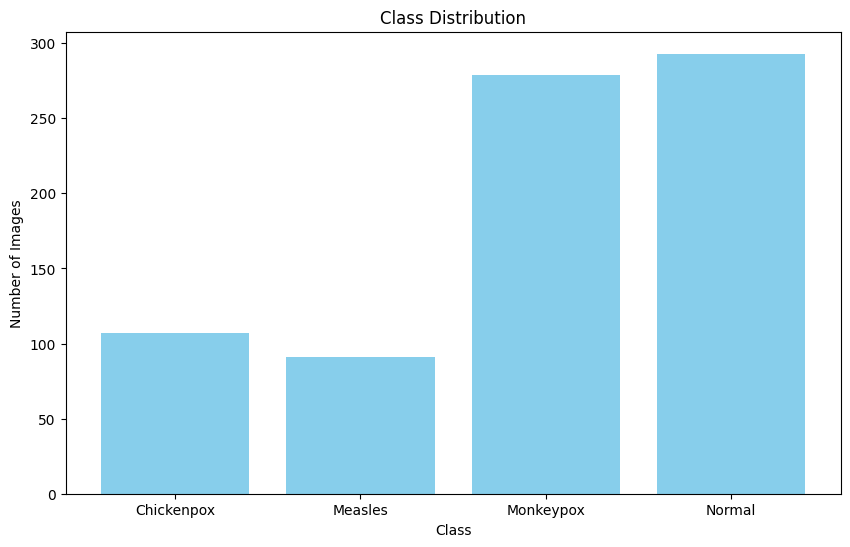

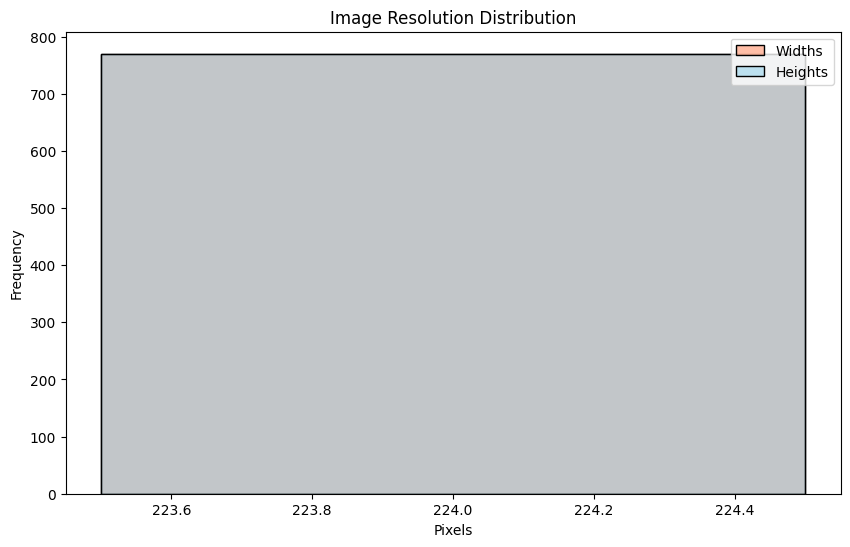

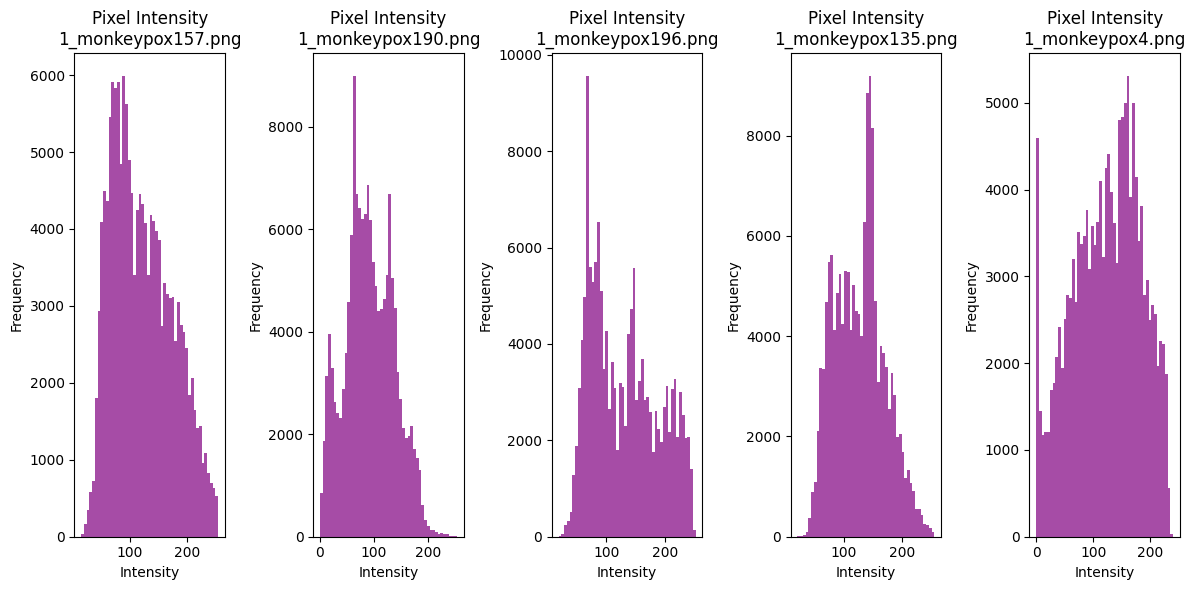

Outlier images (resolution > 1000 pixels): 0


In [ ]:
#Include plots for EDA
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import seaborn as sns
from collections import Counter

# Paths
base_dir = '/content/drive/MyDrive/aggregated_images'

# Checking Class Distribution
class_counts = {}
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

# Plotting class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Checking Image Resolutions
image_resolutions = []
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        with Image.open(img_path) as img:
            image_resolutions.append(img.size)

# Plotting resolution distribution
widths, heights = zip(*image_resolutions)
plt.figure(figsize=(10, 6))
sns.histplot(widths, label='Widths', color='coral', kde=True)
sns.histplot(heights, label='Heights', color='skyblue', kde=True)
plt.title('Image Resolution Distribution')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Pixel Intensity Distribution
def plot_pixel_intensity(class_dir, num_samples=5):
    plt.figure(figsize=(12, 6))
    for i, img_file in enumerate(os.listdir(class_dir)[:num_samples]):
        img_path = os.path.join(class_dir, img_file)
        with Image.open(img_path) as img:
            img_data = np.array(img).flatten()
            plt.subplot(1, num_samples, i+1)
            plt.hist(img_data, bins=50, color='purple', alpha=0.7)
            plt.title(f'Pixel Intensity\n{img_file}')
            plt.xlabel('Intensity')
            plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Example: Plotting pixel intensity for one class (e.g., 'monkeypox')
plot_pixel_intensity(os.path.join(base_dir, 'Monkeypox'))

# Outlier Detection: Identifying images with extreme resolutions
outliers = [res for res in image_resolutions if res[0] > 1000 or res[1] > 1000]
print(f"Outlier images (resolution > 1000 pixels): {len(outliers)}")




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

**Hypothesis Testing**

This study examines whether specific visual features within our image dataset, such as pixel intensity patterns and texture characteristics, effectively distinguish between various disease types represented in the dataset. If these features differ significantly between classes, it could support their utility in image-based disease classification.

**Methodology for Empirical Testing**

A) **Feature Extraction**: Extract relevant visual features from each image, including pixel intensity histograms, texture patterns, and color distributions. These features will provide measurable data points for comparing images across different disease classes.

B) **Statistical Analysis**: Conduct statistical tests (e.g., ANOVA) on the extracted features to evaluate differences across disease classes. These tests will determine if there are statistically significant variations in visual features, such as pixel intensity and texture patterns, that could indicate unique characteristics of each disease type.

C) **Classification Model Evaluation**: Develop a preliminary classification model using the extracted features. By measuring the model's accuracy in distinguishing between classes, we can determine if these visual features contribute to effective disease classification. High classification accuracy would suggest that the features hold discriminative power, supporting our hypothesis about the dataset.

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

**Assessing Data Density**

For image data, "density" often refers to the consistency in image features (e.g., resolution, pixel intensity). This assessment helps us decide if certain preprocessing steps are needed to balance the dataset, such as resizing or intensity normalization.

**Proposed Strategies for Handling Missing Data and Outliers**

**1) Handling Missing Data:** In image datasets, missing data can include absent images in certain classes or corrupted image files that cannot be accessed or used for training. To address this, one effective strategy is to use placeholder images for missing files, especially if a placeholder image can provide some minimal data for the model to learn general characteristics of a class. However, if the missing samples are substantial and significantly affect class balance, removing these samples may be necessary to maintain dataset integrity. In cases where missing data is unavoidable, it better to ensure that each class maintains a minimum number of samples to support balanced training and prevent biases during model training.

**2) Handling Outliers:** Outliers in image datasets can manifest as images with unusually high resolution, excessively large or small file sizes, or atypical color distributions. Such outliers can impact model performance by introducing variability that is not representative of the majority of the dataset. To address this, one practical approach is to rescale high-resolution images to a standardized resolution, such as 224x224 pixels, ensuring that all images have a consistent size and are easier to process in batches. Additionally, applying pixel intensity normalization can help to standardize brightness and contrast across images, adjusting for any unusually dark or bright images that might disrupt model learning. This normalization enhances the model's ability to focus on the relevant features of each class without being distracted by unusual intensity variations.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [ ]:
import os
from PIL import Image

# Function to process image resolution: Resizes images that exceed max_resolution
def process_image_resolution(base_dir, target_size=(224, 224), max_resolution=1000):
    # Loop through each class directory in the base directory
    for class_name in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, class_name)

        # Check if the path is a directory (to skip files)
        if not os.path.isdir(class_dir):
            continue  # Skip files and only process directories

        # Loop through each image file in the class directory
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            try:
                # Open and process the image
                with Image.open(img_path) as img:
                    # Check if image resolution exceeds the maximum allowed
                    if max(img.size) > max_resolution:
                        # Resize the image to the target size if it exceeds max_resolution
                        img = img.resize(target_size)
                        # Save the resized image back to the same path
                        img.save(img_path)
            except Exception as e:
                # Handle errors (e.g., corrupted images or unreadable files)
                print(f"Error processing {img_path}: {e}")


# Function to handle pixel intensity normalization: Normalizes pixel intensities to a specific range
def normalize_pixel_intensity(img_path):
    try:
        # Open and process the image
        with Image.open(img_path) as img:
            # Convert the image to grayscale
            img = img.convert("L")
            # Normalize pixel intensities (this is an attempt to rescale intensity values)
            img = img.point(lambda p: p * (255.0 / max(1, img.getextrema()[1])))  # Normalize intensities
            return img  # Return the normalized image
    except Exception as e:
        # Handle errors in image processing
        print(f"Error normalizing {img_path}: {e}")
        return None

# Usage example to process images in a directory
base_dir = '/content/drive/MyDrive/aggregated_images'
process_image_resolution(base_dir)  # Start the resolution processing


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

**Data Splitting Methodology**

To properly evaluate the performance of the model, the dataset will be divided into three subsets: training, validation, and testing.

- Training Set (80%): Used to train the model, allowing it to learn patterns and relationships in the data.

- Validation Set (10%): Used to fine-tune model hyperparameters and prevent overfitting.

- Testing Set (10%): Used to evaluate the model’s final performance on unseen data.

The dataset will be shuffled randomly to ensure fairness and prevent bias, and stratified sampling will be applied if the data is imbalanced, ensuring proportional representation of all classes in each subset.



7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
**Techniques to Identify and Mitigate Biases in the Dataset**

1) Balanced Sampling: Ensure balanced representation across different classes by employing upsampling or data augmentation techniques for underrepresented classes. This approach helps prevent model bias towards overrepresented groups.

2) Ensuring Diverse Representation in Training Data and Model Evaluation: Make sure that the training data reflects diverse demographic groups and real-world conditions. Additionally, assess model performance across these diverse groups during evaluation to ensure fairness and equity.

3) Exploratory Data Analysis (EDA): Conduct a thorough analysis of class distribution, image resolution, and pixel intensity distributions. EDA helps uncover potential imbalances or skewed patterns in the data that could indicate bias and informs further preprocessing strategies.

4) Random Sampling: Use random sampling to reduce selection bias, ensuring that every instance in the population has an equal chance of being included. This method minimizes the risk of over-representing or under-representing any specific group.





In [ ]:
import tensorflow as tf

def splitting_dataset_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)  # Shuffle the dataset

    # Calculate sizes for train, validation, and test
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    # Split dataset
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

# Example usage with an image dataset (you can replace it with your own dataset)
base_dir = '/content/drive/MyDrive/aggregated_images'  # The dataset directory

# Assuming dataset is a TensorFlow dataset of image paths or preprocessed images
dataset = tf.data.Dataset.list_files(base_dir + '/*/*')
train_ds, val_ds, test_ds = splitting_dataset_tf(dataset)

# You can now inspect the sizes of each split (train, validation, test)
print(f"Training dataset size: {len(list(train_ds))}")
print(f"Validation dataset size: {len(list(val_ds))}")
print(f"Test dataset size: {len(list(test_ds))}")


Training dataset size: 616
Validation dataset size: 77
Test dataset size: 77


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

For training an image classification model, relevant features are identified by analyzing the pixel data and extracting visual characteristics that highlight differences among various disease types. This process includes both feature extraction and ranking to determine the most informative features for accurate classification.

**Approach to Feature Extraction and Ranking**

Key features that are useful in distinguishing between disease types include:

**1) Edges:** Captured using edge detection techniques, such as Sobel or Canny filters, to highlight boundaries and structural outlines within the images.

**2) Texture:** Quantified with texture descriptors like Local Binary Patterns (LBP), which help in identifying patterns and repeated elements within images.

**3) Color Histograms:** Capture the distribution of color intensities, providing insight into the dominant shades and tones across the images.

**4)Key Points (Corners):** Identified through feature detectors like Harris or SIFT, which focus on unique points or shapes within the images that may vary between classes.

Once extracted, these features are evaluated and ranked based on their relevance to the classification objective. By using feature selection techniques, such as variance analysis or statistical tests, we can assess the importance of each feature and prioritize those that contribute most significantly to the model’s ability to differentiate disease classes.

Based on the information provided in the bar plot below, the ranking of feature importance for model training is:

- Corner Count: This feature has the highest importance score, indicating it is the most important for the model training.

- LBP Mean: The mean of the Local Binary Pattern (LBP) texture feature has the second highest importance score.

- Edge Mean: The mean of the edge feature obtained from Canny edge detection has the third highest importance score.

- Color Hist Mean: This feature does not have a bar, which implies its importance score is 0. This means the color histogram feature is not important for the model training in this case.

9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

In analyzing this dataset, we identify two primary data types:

1. **Numerical Data**: This data includes quantitative features like edge mean, texture values (e.g., Local Binary Pattern mean), color histograms, and corner intensity. These measurements capture distinct visual aspects of the image content, essential for model training. Since these features vary in scale, preprocessing them with techniques like scaling or normalization is necessary to ensure they contribute equally to the learning process.

2. **Categorical Data**: This data comprises the class labels (e.g., monkeypox, measles), categorically defining the disease type represented in each image. As models work with numerical data, converting these categorical labels into numeric form—through label encoding or one-hot encoding—will be crucial for compatibility and model interpretability.

**Planned Preprocessing Steps:**

- **For numerical data**, we will apply standardization (using StandardScaler) or normalization to bring feature values into a comparable range. This is particularly important as different features, such as color histograms, may vary significantly in scale, and normalization allows each feature to influence the model proportionally.
  
- **For categorical data**, we will use either label encoding or one-hot encoding to convert class labels into numerical formats. This transformation allows the model to interpret categorical data correctly and learn meaningful patterns.

By systematically preprocessing each data type, we prepare the dataset in an optimal format for training, supporting consistent, accurate model performance while ensuring that features align effectively in scale and representation.





/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


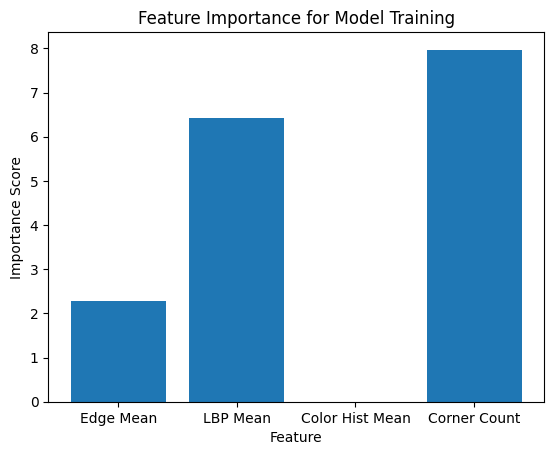

In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import os
from PIL import Image
import matplotlib.pyplot as plt

# Parameters
base_dir = '/content/drive/MyDrive/aggregated_images'
num_samples = 100  # Limit number of samples for demonstration

# Feature extraction function
def extract_features(img_path):
    features = []

    # Load image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Edge detection
    edges = cv2.Canny(img, 100, 200)
    edge_feature = np.mean(edges)
    features.append(edge_feature)

    # Texture - Local Binary Pattern
    lbp = local_binary_pattern(img, P=8, R=1, method="uniform")
    lbp_feature = lbp.mean()
    features.append(lbp_feature)

    # Color histogram (grayscale histogram here)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    color_hist_feature = hist.mean()
    features.append(color_hist_feature)

    # Key Corners - Shi-Tomasi Corner Detection
    corners = cv2.goodFeaturesToTrack(img, 100, 0.01, 10)
    if corners is not None:
        corner_feature = len(corners)  # Number of detected corners as a feature
    else:
        corner_feature = 0
    features.append(corner_feature)

    return features

# Collecting features from a subset of images
X = []
y = []
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    for img_file in os.listdir(class_dir)[:num_samples // len(os.listdir(base_dir))]:
        img_path = os.path.join(class_dir, img_file)
        try:
            X.append(extract_features(img_path))
            y.append(class_name)  # Assuming each class_name is the label
        except:
            print(f"Error processing {img_path}")

# Standardize features for comparison
X = StandardScaler().fit_transform(X)

# Rank features using SelectKBest and ANOVA F-statistic
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
feature_scores = selector.scores_

# Plot feature importance
feature_names = ['Edge Mean', 'LBP Mean', 'Color Hist Mean', 'Corner Count']
plt.bar(feature_names, feature_scores)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Model Training")
plt.show()



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

To prepare the raw data for machine learning models, we will apply a series of transformations that ensure consistency across features and compatibility with the model’s requirements. This process includes scaling and encoding steps, which are essential for achieving optimal performance and interpretability.

**1. Normalization and Scaling of Numerical Features**

For numerical features such as edge mean, texture (LBP mean), color histogram values, and corner intensity, we will use *standardization*. Standardization adjusts the values so that each feature has a mean of zero and a standard deviation of one. This step ensures that all features are on a similar scale, which helps the model converge more quickly and avoids giving undue importance to features with larger ranges.

   - **Standardization**: Using `StandardScaler` from `sklearn`, we will transform each numerical feature independently. This scaler adjusts each feature’s mean to 0 and variance to 1, allowing for balanced contribution across features during training.

**2. Encoding Categorical Variables**

The categorical data in this dataset is the class label, representing different disease types (e.g., monkeypox, measles). Since machine learning models require numerical input, these categorical labels must be transformed into a format the model can process.

   - **Label Encoding**: This method assigns an integer to each category, making it simple for algorithms that can interpret categorical order. Label encoding will be appropriate for models that do not require a binary representation.
   
   - **One-Hot Encoding**: This method converts each label into a binary vector, where each category has its own column, and a value of 1 indicates the presence of the category. This approach is effective for deep learning models, which may benefit from a broader feature space for categorical variables.

**Summary of Steps**

1. **Numerical Features**: Apply standardization to edge mean, LBP mean, color histogram, and corner intensity metrics to ensure consistent scaling.
2. **Categorical Labels**: Use either label encoding (for simpler models) or one-hot encoding (for deep learning models) to transform disease type labels into numerical representations.

These transformations will ensure that our dataset is in a model-friendly format, with each feature optimally scaled and encoded to support effective learning and improve model accuracy.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

In this project, careful consideration is given to data storage to ensure both accessibility for model training and security for sensitive data. Processed data, including feature-engineered datasets and labeled images, will be stored in a structured directory on a secure cloud storage solution, such as Google Drive or Amazon S3. This approach provides easy access for team members and seamless integration with cloud-based machine learning tools.

For long-term storage and version control, this project will also utilize a relational database, such as MySQL or PostgreSQL, where data transformations and metadata (e.g., preprocessing steps) are documented. This ensures that any changes in data processing are tracked, enhancing reproducibility and compliance with best practices. Secure access controls, such as user authentication and data encryption, will be applied to protect sensitive information within these storage environments. By balancing accessibility with security, this storage plan supports efficient data handling and aligns with the project’s requirements.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from skimage.feature import local_binary_pattern

# Parameters
base_dir = '/content/drive/MyDrive/aggregated_images'
num_samples = 100  # Limit number of samples for demonstration

# Define feature extraction function
def extract_features(img_path):
    features = []

    # Load image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Edge detection (Canny)
    edges = cv2.Canny(img, 100, 200)
    edge_feature = np.mean(edges)
    features.append(edge_feature)

    # Texture - Local Binary Pattern
    lbp = local_binary_pattern(img, P=8, R=1, method="uniform")
    lbp_feature = lbp.mean()
    features.append(lbp_feature)

    # Color histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    color_hist_feature = hist.mean()
    features.append(color_hist_feature)

    # Additional feature (corner intensity example)
    corners = cv2.goodFeaturesToTrack(img, 100, 0.01, 10)
    corner_intensity = np.mean(corners) if corners is not None else 0
    features.append(corner_intensity)

    return features

# Collect features and labels from images
X = []
y = []
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    for img_file in os.listdir(class_dir)[:num_samples // len(os.listdir(base_dir))]:
        img_path = os.path.join(class_dir, img_file)
        try:
            X.append(extract_features(img_path))
            y.append(class_name)  # Assuming class name is the label
        except:
            print(f"Error processing {img_path}")

# Convert lists to numpy arrays for consistency
X = np.array(X)
y = np.array(y)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# (Optional) One-Hot Encode labels for deep learning models
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_one_hot = one_hot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Print shapes to confirm processing
print("Feature matrix shape:", X_train.shape)
print("Encoded labels shape:", y_train.shape)


Feature matrix shape: (80, 4)
Encoded labels shape: (80,)
